## Stock- Exchange Data- Time Series Analysis

### Importing the Data & Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dow_jones= pd.read_csv('DowJones.csv')
dow_jones.head()

,Date,Value
0,1977-09-02,872.31
1,1977-09-09,857.04
2,1977-09-16,856.81
3,1977-09-23,839.14
4,1977-09-30,847.11


In [4]:
nasdaq= pd.read_csv('Nasdaq.csv')
nasdaq.head()

,Date,Value
0,1977-09-02,100.83
1,1977-09-09,100.91
2,1977-09-16,100.74
3,1977-09-23,99.57
4,1977-09-30,100.85


In [5]:
sp= pd.read_csv('SP500.csv')
sp.head()

,Date,Value
0,1977-09-02,97.45
1,1977-09-09,96.37
2,1977-09-16,96.48
3,1977-09-23,95.04
4,1977-09-30,96.53


### Time Series Forecasting

In [7]:
merge1= pd.merge(dow_jones,nasdaq,on='Date')
data=pd.merge(merge1,sp,on='Date')

In [8]:
data.columns=['Date','Dow Jones Value','NASDAQ','SP500']

In [9]:
data.head()

,Date,Dow Jones Value,NASDAQ,SP500
0,1977-09-02,872.31,100.83,97.45
1,1977-09-09,857.04,100.91,96.37
2,1977-09-16,856.81,100.74,96.48
3,1977-09-23,839.14,99.57,95.04
4,1977-09-30,847.11,100.85,96.53


In [10]:
data.shape

(2078, 4)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2077
Data columns (total 4 columns):
Date               2078 non-null object
Dow Jones Value    2078 non-null float64
NASDAQ             2078 non-null float64
SP500              2078 non-null float64
dtypes: float64(3), object(1)
memory usage: 81.2+ KB


In [12]:
data['Date']=pd.to_datetime(data['Date'])

In [13]:
data= data.groupby(['Date']).sum()

In [14]:
data.head()

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-02,872.31,100.83,97.45
1977-09-09,857.04,100.91,96.37
1977-09-16,856.81,100.74,96.48
1977-09-23,839.14,99.57,95.04
1977-09-30,847.11,100.85,96.53


In [15]:
#Weekly Sample
df=data.resample('W').sum()
df

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-04,872.31,100.8300,97.45
1977-09-11,857.04,100.9100,96.37
1977-09-18,856.81,100.7400,96.48
1977-09-25,839.14,99.5700,95.04
1977-10-02,847.11,100.8500,96.53
...,...,...,...
2017-08-06,22092.81,6351.5600,2476.83
2017-08-13,21858.32,6256.5600,2441.32
2017-08-20,21674.51,6216.5300,2425.55


In [16]:
df.isnull().sum()

Dow Jones Value    0
NASDAQ             0
SP500              0
dtype: int64

### Visualizing the Time Series Data

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


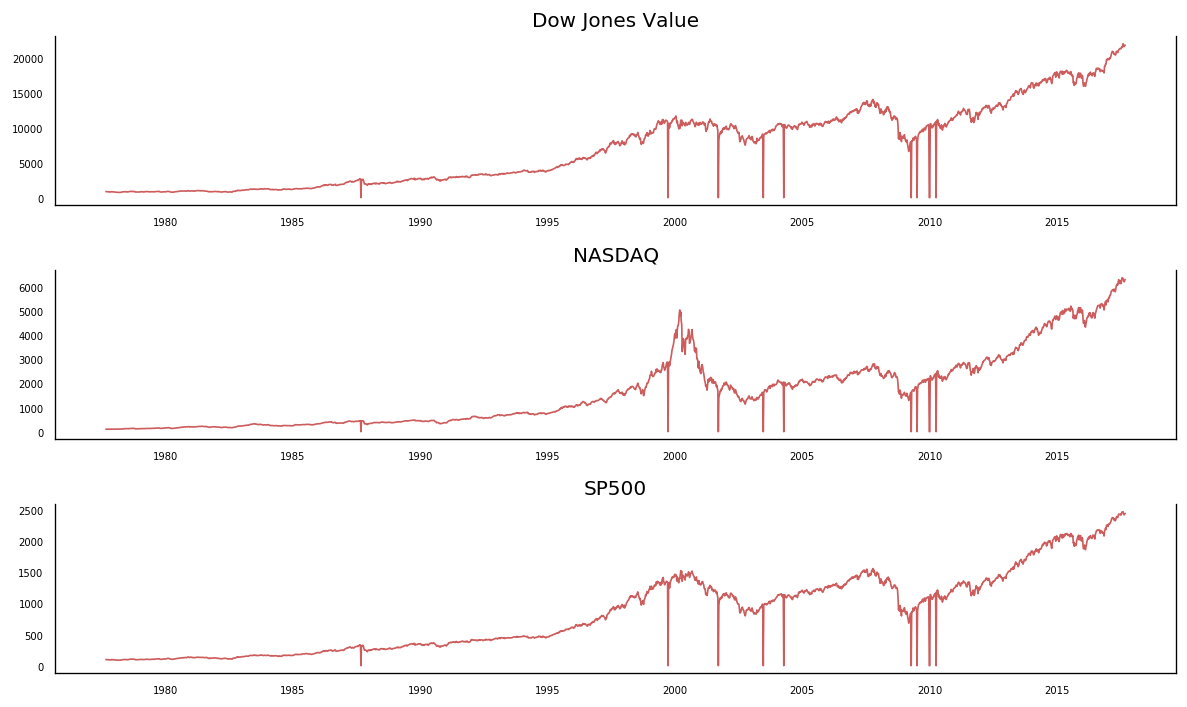

In [17]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='indianred', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

### Check for Stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   

In [19]:
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Dow Jones Value" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.3093
 No. Lags Chosen       = 26
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.9967. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "NASDAQ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.8567
 No. Lags Chosen       = 26
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.9925. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SP500" 
    -----------------------------------------------
 Null Hypothesis: Da

##### All the features are non-stationary

### Integrating the Time Series to the order of one

In [20]:
# 1st difference
df_differenced = df.diff().dropna()

In [21]:
df_differenced

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-11,-15.27,0.0800,-1.08
1977-09-18,-0.23,-0.1700,0.11
1977-09-25,-17.67,-1.1700,-1.44
1977-10-02,7.97,1.2800,1.49
1977-10-09,-6.76,0.7700,-0.56
...,...,...,...
2017-08-06,262.50,-23.1200,4.73
2017-08-13,-234.49,-95.0000,-35.51
2017-08-20,-183.81,-40.0300,-15.77


In [22]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Dow Jones Value" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1421
 No. Lags Chosen       = 26
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NASDAQ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8072
 No. Lags Chosen       = 25
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SP500" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance 

###### All the features are now stationary

### Granger Causality Test

In [23]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=5
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_differenced, variables = df.columns)        

,Dow Jones Value_x,NASDAQ_x,SP500_x
Dow Jones Value_y,1.0000,0.6207,0.1222
NASDAQ_y,0.0000,1.0000,0.0000
SP500_y,0.0261,0.2816,1.0000


So, looking at the p-values, we can assume that, all the variables (time series) in the system are interchangeably causing each other. This justifies the VAR modeling approach for this system of multi time-series to forecast.

### Johansen Co-integration Test

In [24]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_differenced)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Dow Jones Value ::  1311.82   > 24.2761   =>   True
NASDAQ ::  608.41    > 12.3212   =>   True
SP500  ::  259.82    > 4.1296    =>   True


##### The test results reveal that the features do have a long term statistical significance hence long term forecasts can be provided

### VAR Model

In [25]:
from statsmodels.tsa.api import VAR
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9,10]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  25.040116955414533
BIC :  25.072579104804145
FPE :  74952241639.70296
HQIC:  25.052010999578666 

Lag Order = 2
AIC :  24.949014371667037
BIC :  25.005845549997442
FPE :  68425708577.30022
HQIC:  24.969837668152586 

Lag Order = 3
AIC :  24.91325855346968
BIC :  24.99447800264732
FPE :  66022324675.97147
HQIC:  24.94301858684918 

Lag Order = 4
AIC :  24.886587862492004
BIC :  24.992214849150276
FPE :  64284755022.88781
HQIC:  24.925292127233785 

Lag Order = 5
AIC :  24.878331263153676
BIC :  25.008385078696612
FPE :  63756193607.75525
HQIC:  24.925987263639687 

Lag Order = 6
AIC :  24.874619307977593
BIC :  25.029119268623646
FPE :  63520011203.556694
HQIC:  24.931234558521222 

Lag Order = 7
AIC :  24.86764149279342
BIC :  25.04660693961933
FPE :  63078376368.14775
HQIC:  24.933223517657378 

Lag Order = 8
AIC :  24.86952492348602
BIC :  25.072975222470795
FPE :  63197362298.38642
HQIC:  24.94408125690025 

Lag Order = 9
AIC :  24.872061102638774
BIC :  25.1000

### Fitting the VAR Model

In [26]:
model_fitted = model.fit(7)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 30, May, 2020
Time:                     16:03:25
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    25.0466
Nobs:                     2080.00    HQIC:                   24.9332
Log likelihood:          -34650.5    FPE:                6.30784e+10
AIC:                      24.8676    Det(Omega_mle):     6.11185e+10
--------------------------------------------------------------------
Results for equation Dow Jones Value
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     33.171369        16.029344            2.069           0.039
L1.Dow Jones Value        -0.087792         0.236665           -0.371           0.711
L1.NASDAQ                  0.6

### Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [27]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Dow Jones Value : 2.01
NASDAQ : 2.0
SP500 : 2.01


The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

The serial correlation seems quite alright. Let’s proceed with the forecast.

### Forecast using VAR Model

In [28]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

7


array([[ -57.67  ,   75.28  ,   13.27  ],
       [ 250.24  ,  -13.07  ,   -0.44  ],
       [ 262.5   ,  -23.12  ,    4.73  ],
       [-234.49  ,  -95.    ,  -35.51  ],
       [-183.81  ,  -40.03  ,  -15.77  ],
       [ 139.16  ,   49.11  ,   17.5   ],
       [  51.7   ,   36.2457,    3.25  ]])

In [29]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=2087)
df_forecast = pd.DataFrame(fc, index=df.index[-2087:], columns=df.columns)

In [30]:
df_forecast

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-11,-60.101889,-7.897780,-5.885091
1977-09-18,-240.464932,-60.718468,-27.225466
1977-09-25,54.396076,8.710677,5.819454
1977-10-02,130.340365,30.669749,14.649385
1977-10-09,67.454860,18.910337,7.805123
...,...,...,...
2017-08-06,10.019837,2.956056,1.120272
2017-08-13,10.019837,2.956056,1.120272
2017-08-20,10.019837,2.956056,1.120272


### Inverting The Transformations

In [31]:
pred= pd.DataFrame(df.iloc[:1])
pred= pred.append(df_forecast) 

In [32]:
pred= pred.cumsum()

In [33]:
pred

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-04,872.310000,100.830000,97.450000
1977-09-11,812.208111,92.932220,91.564909
1977-09-18,571.743179,32.213752,64.339443
1977-09-25,626.139255,40.924429,70.158897
1977-10-02,756.479620,71.594178,84.808282
...,...,...,...
2017-08-06,21575.474628,6213.998700,2412.484561
2017-08-13,21585.494464,6216.954756,2413.604833
2017-08-20,21595.514301,6219.910812,2414.725106


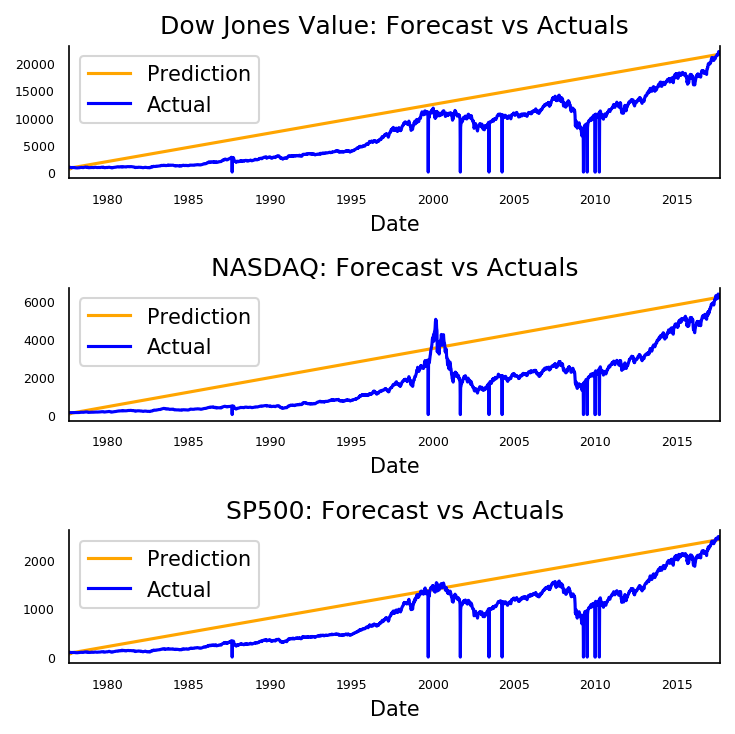

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(5,5))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    pred[col].plot(legend=True, ax=ax,color='Orange',label='Prediction').autoscale(axis='x',tight=True)
    df[col].plot(legend=True, ax=ax,color='blue',label='Actual');
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [35]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({ 'rmse':rmse})

print('Forecast Accuracy of: Dow Jones Value')
accuracy_prod = forecast_accuracy(pred['Dow Jones Value'].values, df['Dow Jones Value'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: NASDAQ')
accuracy_prod = forecast_accuracy(pred['NASDAQ'].values, df['NASDAQ'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: SP500')
accuracy_prod = forecast_accuracy(pred['SP500'].values, df['SP500'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: Dow Jones Value
rmse :  4394.4984
Forecast Accuracy of: NASDAQ
rmse :  1726.5887
Forecast Accuracy of: SP500
rmse :  481.8365


### VMA

In [36]:
from statsmodels.tsa.statespace.varmax import VARMAX
model= VARMAX(df_differenced, order=(0, 2))
model=model.fit()

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [37]:
print(model.summary())

                                     Statespace Model Results                                     
Dep. Variable:     ['Dow Jones Value', 'NASDAQ', 'SP500']   No. Observations:                 2087
Model:                                             VMA(2)   Log Likelihood              -34811.370
                                              + intercept   AIC                          69676.740
Date:                                    Sat, 30 May 2020   BIC                          69829.114
Time:                                            16:04:19   HQIC                         69732.568
Sample:                                        09-11-1977                                         
                                             - 09-03-2017                                         
Covariance Type:                                      opg                                         
Ljung-Box (Q):          106.29, 164.89, 89.49   Jarque-Bera (JB):   1561017.65, 366766.73, 102858.89
Prob(Q):

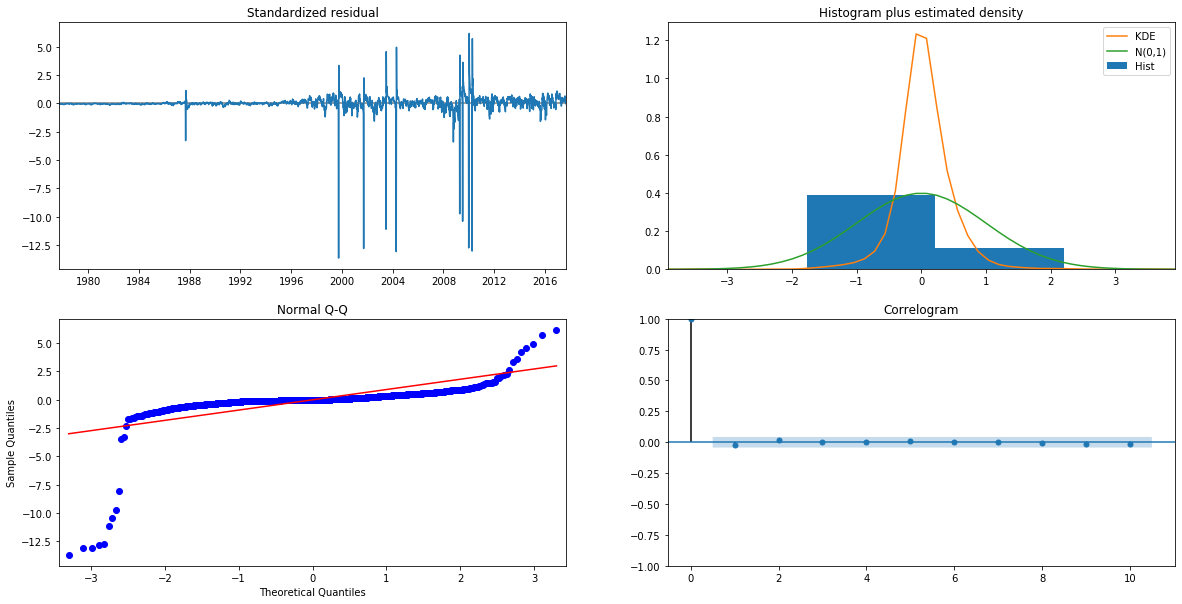

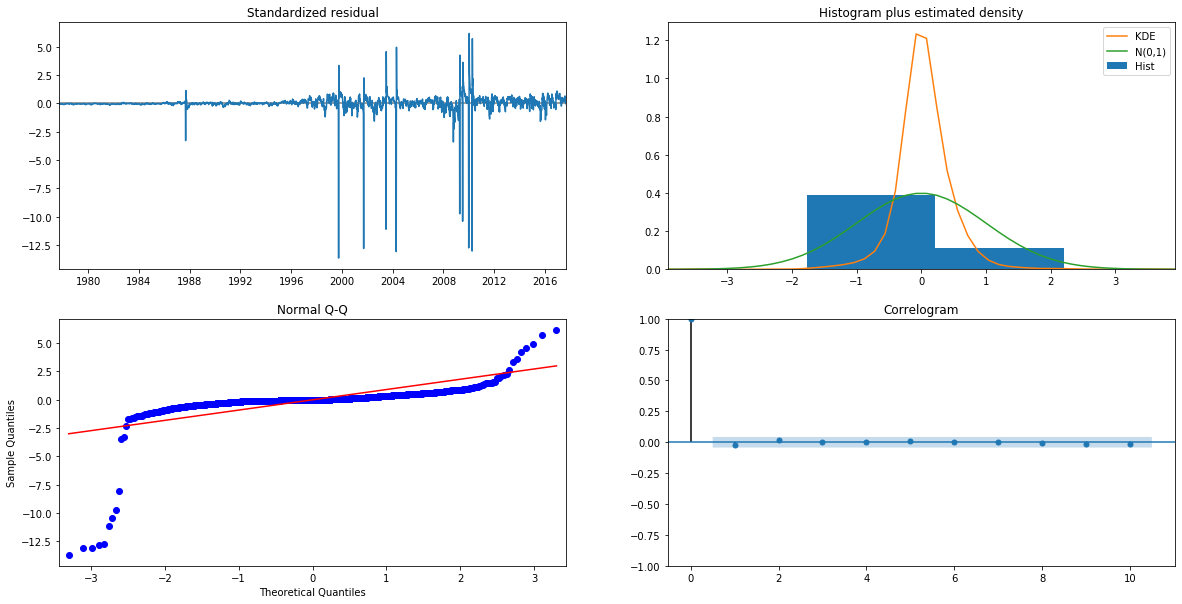

In [38]:
model.plot_diagnostics(figsize=(20,10))

In [39]:
df_forecast= model.predict(start='1977-09-11',end='2017-09-03')
df_forecast

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-11,10.058929,2.971281,1.125490
1977-09-18,18.182814,4.439548,1.940830
1977-09-25,24.861492,6.016374,2.682524
1977-10-02,34.442034,7.765256,3.710053
1977-10-09,32.927560,7.635079,3.459921
...,...,...,...
2017-08-06,-182.747984,-33.149680,-17.034204
2017-08-13,-326.614438,-51.207653,-28.797139
2017-08-20,-144.925685,-15.866522,-10.447614


### Inverting The Transformations

In [40]:
pred= pd.DataFrame(df.iloc[:1])
pred= pred.append(df_forecast) 
pred

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-04,872.310000,100.830000,97.450000
1977-09-11,10.058929,2.971281,1.125490
1977-09-18,18.182814,4.439548,1.940830
1977-09-25,24.861492,6.016374,2.682524
1977-10-02,34.442034,7.765256,3.710053
...,...,...,...
2017-08-06,-182.747984,-33.149680,-17.034204
2017-08-13,-326.614438,-51.207653,-28.797139
2017-08-20,-144.925685,-15.866522,-10.447614


In [41]:
pred= pred.cumsum()

In [42]:
pred

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-04,872.310000,100.830000,97.450000
1977-09-11,882.368929,103.801281,98.575490
1977-09-18,900.551743,108.240829,100.516319
1977-09-25,925.413235,114.257203,103.198843
1977-10-02,959.855269,122.022459,106.908896
...,...,...,...
2017-08-06,23119.598936,6527.307006,2569.994271
2017-08-13,22792.984498,6476.099353,2541.197132
2017-08-20,22648.058813,6460.232830,2530.749518


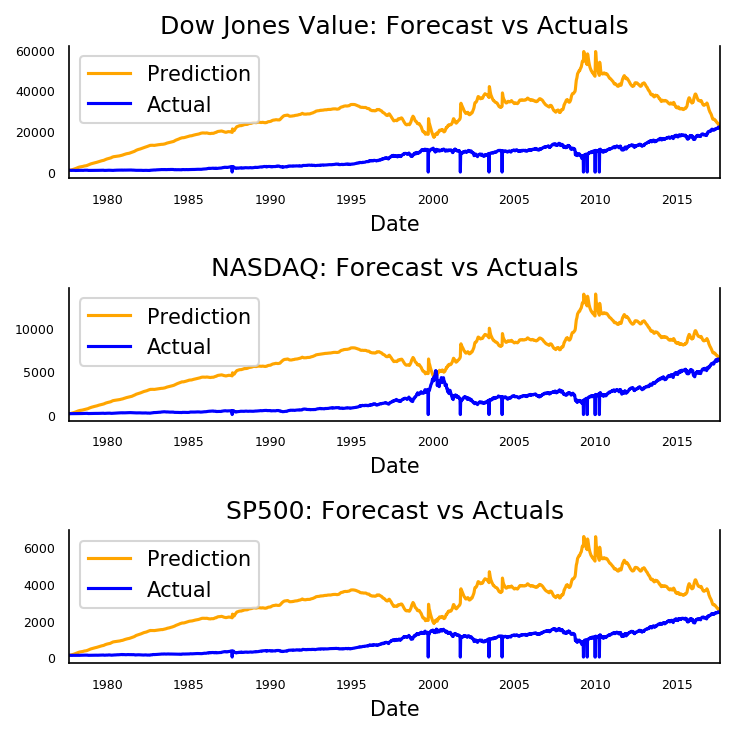

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(5,5))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    pred[col].plot(legend=True, ax=ax,color='Orange',label='Prediction').autoscale(axis='x',tight=True)
    df[col].plot(legend=True, ax=ax,color='blue',label='Actual');
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [44]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({ 'rmse':rmse})

print('Forecast Accuracy of: Dow Jones Value')
accuracy_prod = forecast_accuracy(pred['Dow Jones Value'].values, df['Dow Jones Value'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: NASDAQ')
accuracy_prod = forecast_accuracy(pred['NASDAQ'].values, df['NASDAQ'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: SP30')
accuracy_prod = forecast_accuracy(pred['SP500'].values, df['SP500'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: Dow Jones Value
rmse :  21961.8763
Forecast Accuracy of: NASDAQ
rmse :  5440.5007
Forecast Accuracy of: SP30
rmse :  2422.665


### VARMA

In [45]:
from statsmodels.tsa.statespace.varmax import VARMAX
model= VARMAX(df_differenced, order=(1, 1))
model=model.fit()

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [46]:
print(model.summary())

                                     Statespace Model Results                                     
Dep. Variable:     ['Dow Jones Value', 'NASDAQ', 'SP500']   No. Observations:                 2087
Model:                                         VARMA(1,1)   Log Likelihood              -34856.606
                                              + intercept   AIC                          69767.212
Date:                                    Sat, 30 May 2020   BIC                          69919.586
Time:                                            16:04:44   HQIC                         69823.040
Sample:                                        09-11-1977                                         
                                             - 09-03-2017                                         
Covariance Type:                                      opg                                         
Ljung-Box (Q):          149.91, 158.08, 113.80   Jarque-Bera (JB):   1569901.69, 345691.97, 120094.33
Prob(Q)

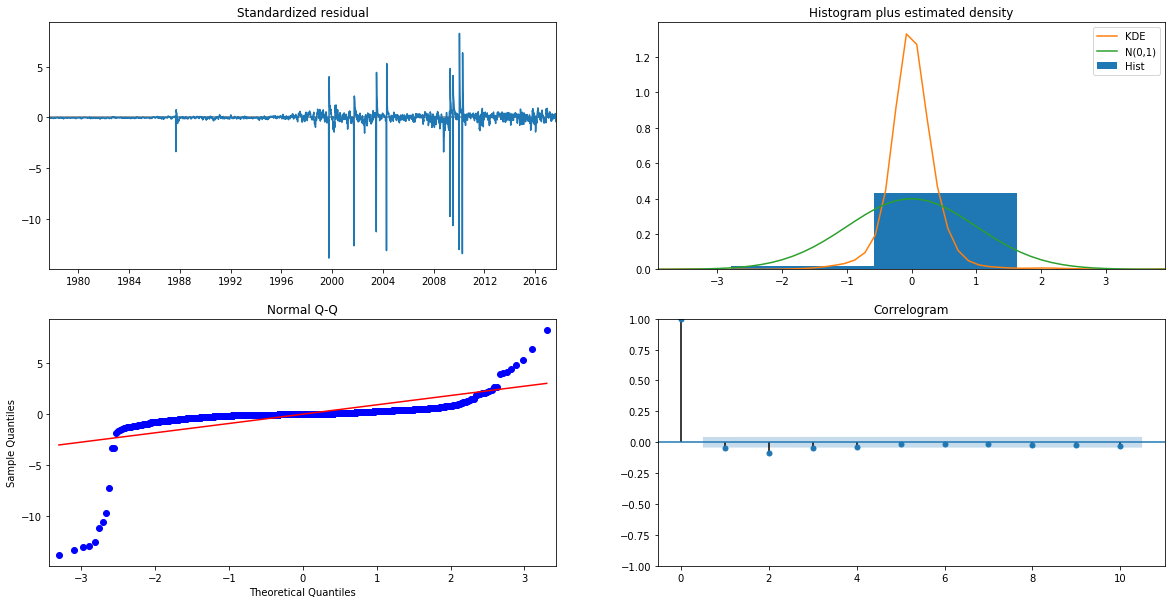

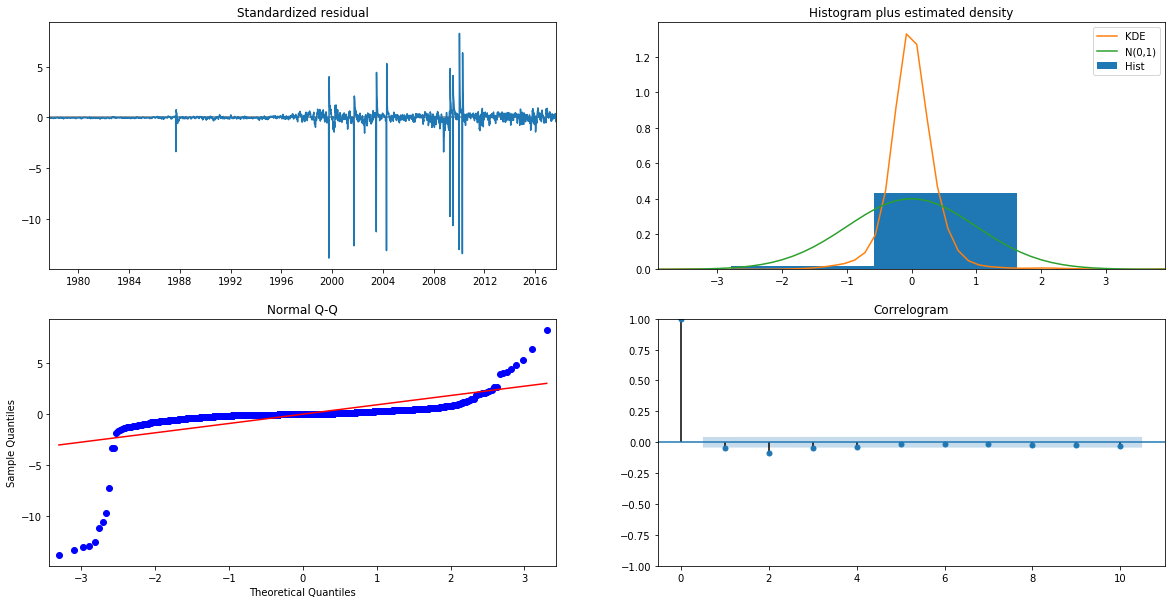

In [47]:
model.plot_diagnostics(figsize=(20,10))

In [48]:
df_forecast= model.predict(start='1977-09-11',end='2017-09-03')
df_forecast

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-11,15.961461,4.382981,1.857744
1977-09-18,28.808462,6.484347,3.204384
1977-09-25,31.220753,7.620191,3.581720
1977-10-02,43.616011,9.911783,4.929175
1977-10-09,34.046125,8.025650,3.846340
...,...,...,...
2017-08-06,-17.914117,21.677687,2.902179
2017-08-13,-32.969888,20.467327,0.502571
2017-08-20,163.134169,46.756719,20.340977


### Inverting The Transformations

In [49]:
pred= pd.DataFrame(df.iloc[:1])
pred= pred.append(df_forecast) 
pred

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-04,872.310000,100.830000,97.450000
1977-09-11,15.961461,4.382981,1.857744
1977-09-18,28.808462,6.484347,3.204384
1977-09-25,31.220753,7.620191,3.581720
1977-10-02,43.616011,9.911783,4.929175
...,...,...,...
2017-08-06,-17.914117,21.677687,2.902179
2017-08-13,-32.969888,20.467327,0.502571
2017-08-20,163.134169,46.756719,20.340977


In [50]:
pred= pred.cumsum()

In [51]:
pred

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-04,872.310000,100.830000,97.450000
1977-09-11,888.271461,105.212981,99.307744
1977-09-18,917.079924,111.697328,102.512128
1977-09-25,948.300677,119.317518,106.093847
1977-10-02,991.916688,129.229301,111.023022
...,...,...,...
2017-08-06,61109.678429,15386.856277,7094.554053
2017-08-13,61076.708540,15407.323604,7095.056624
2017-08-20,61239.842709,15454.080323,7115.397601


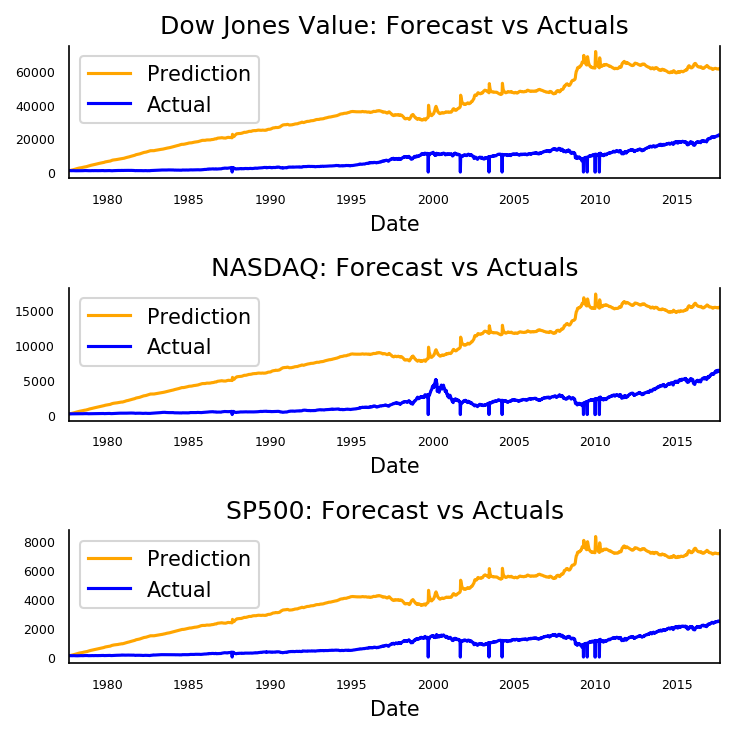

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(5,5))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    pred[col].plot(legend=True, ax=ax,color='Orange',label='Prediction').autoscale(axis='x',tight=True)
    df[col].plot(legend=True, ax=ax,color='blue',label='Actual');
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [53]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({ 'rmse':rmse})

print('Forecast Accuracy of: Dow Jones Value')
accuracy_prod = forecast_accuracy(pred['Dow Jones Value'].values, df['Dow Jones Value'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: NASDAQ')
accuracy_prod = forecast_accuracy(pred['NASDAQ'].values, df['NASDAQ'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: SP30')
accuracy_prod = forecast_accuracy(pred['SP500'].values, df['SP500'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: Dow Jones Value
rmse :  32206.3962
Forecast Accuracy of: NASDAQ
rmse :  8130.3011
Forecast Accuracy of: SP30
rmse :  3749.5611


### VARMAX

In [54]:
from statsmodels.tsa.statespace.varmax import VARMAX
model= VARMAX(df_differenced, order=(1, 0))
model=model.fit()

In [55]:
print(model.summary())

                                     Statespace Model Results                                     
Dep. Variable:     ['Dow Jones Value', 'NASDAQ', 'SP500']   No. Observations:                 2087
Model:                                             VAR(1)   Log Likelihood              -34999.955
                                              + intercept   AIC                          70035.910
Date:                                    Sat, 30 May 2020   BIC                          70137.493
Time:                                            16:04:53   HQIC                         70073.129
Sample:                                        09-11-1977                                         
                                             - 09-03-2017                                         
Covariance Type:                                      opg                                         
Ljung-Box (Q):          371.11, 159.02, 95.20   Jarque-Bera (JB):   1143840.16, 373742.53, 113041.32
Prob(Q):

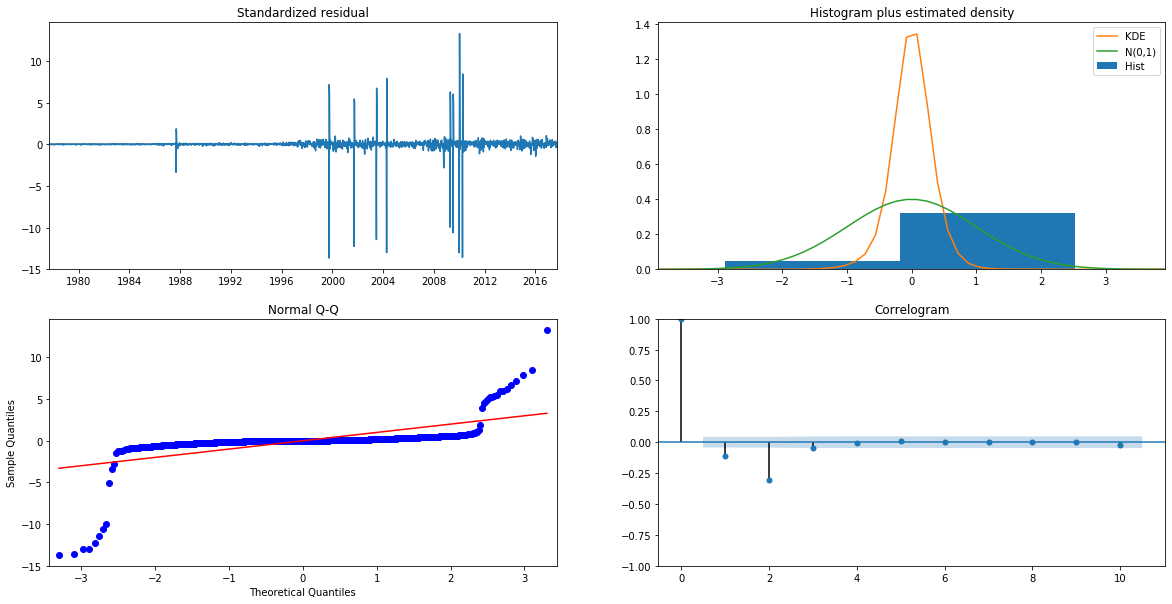

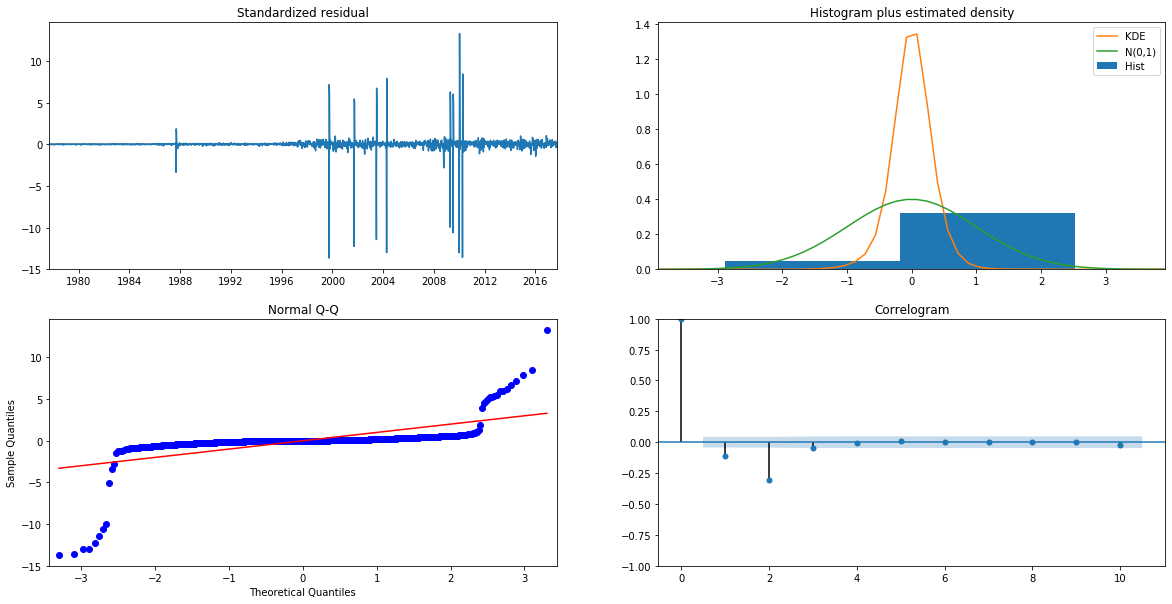

In [56]:
model.plot_diagnostics(figsize=(20,10))

In [57]:
df_forecast= model.predict(start='1977-09-11',end='2017-09-03')
df_forecast

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-11,10.060071,2.971417,1.125763
1977-09-18,19.148737,4.458837,2.027087
1977-09-25,13.885441,3.714472,1.509975
1977-10-02,20.250607,4.756965,2.164043
1977-10-09,9.698563,2.584842,0.918376
...,...,...,...
2017-08-06,-35.362626,11.057578,2.201636
2017-08-13,-48.134801,6.519066,-0.360966
2017-08-20,123.666534,32.954378,15.621234


### Inverting The Transformations

In [58]:
pred= pd.DataFrame(df.iloc[:1])
pred= pred.append(df_forecast) 
pred

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-04,872.310000,100.830000,97.450000
1977-09-11,10.060071,2.971417,1.125763
1977-09-18,19.148737,4.458837,2.027087
1977-09-25,13.885441,3.714472,1.509975
1977-10-02,20.250607,4.756965,2.164043
...,...,...,...
2017-08-06,-35.362626,11.057578,2.201636
2017-08-13,-48.134801,6.519066,-0.360966
2017-08-20,123.666534,32.954378,15.621234


In [59]:
pred= pred.cumsum()

In [60]:
pred

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-04,872.310000,100.830000,97.450000
1977-09-11,882.370071,103.801417,98.575763
1977-09-18,901.518808,108.260254,100.602850
1977-09-25,915.404249,111.974726,102.112825
1977-10-02,935.654856,116.731691,104.276868
...,...,...,...
2017-08-06,21770.354657,6259.890951,2429.792008
2017-08-13,21722.219856,6266.410017,2429.431042
2017-08-20,21845.886390,6299.364395,2445.052276


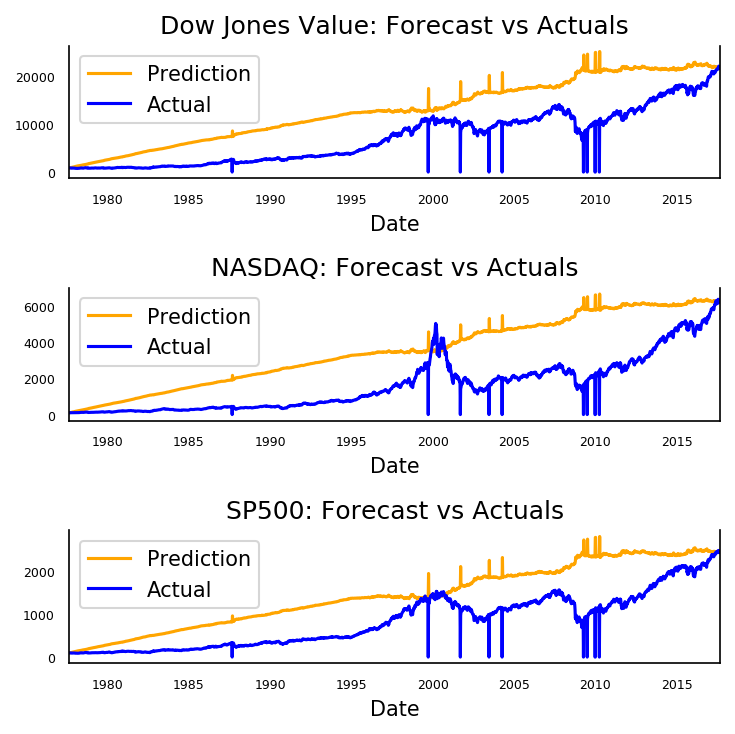

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(5,5))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    pred[col].plot(legend=True, ax=ax,color='Orange',label='Prediction').autoscale(axis='x',tight=True)
    df[col].plot(legend=True, ax=ax,color='blue',label='Actual');
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [62]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({ 'rmse':rmse})

print('Forecast Accuracy of: Dow Jones Value')
accuracy_prod = forecast_accuracy(pred['Dow Jones Value'].values, df['Dow Jones Value'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: NASDAQ')
accuracy_prod = forecast_accuracy(pred['NASDAQ'].values, df['NASDAQ'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: SP30')
accuracy_prod = forecast_accuracy(pred['SP500'].values, df['SP500'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: Dow Jones Value
rmse :  6341.4177
Forecast Accuracy of: NASDAQ
rmse :  2156.8835
Forecast Accuracy of: SP30
rmse :  688.7566
